In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
planets = sns.load_dataset('planets')

## Planetary Survey Dataset Head Sample

In [87]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Planetary Survey Dataset Description

In [88]:
planets.describe

<bound method NDFrame.describe of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

## Planetary Survey Dataset Info

In [89]:

planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Relationship Between Low Mass (Rocky) Planets and Orbital Period Linear Regression Modelling

In [90]:
M = 10
low_mass_planets = planets[planets['mass'] < M][['mass','orbital_period']].dropna()
X = planets[planets['mass'] < M][['mass','orbital_period']].dropna()['mass'].values
y = planets[planets['mass'] < M][['mass','orbital_period']].dropna()['orbital_period'].values

In [91]:
X = X.reshape(-1, 1)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

print(f'X_train shape: [{x_train.shape}]')
print(f'X_test shape: [{x_test.shape}]')
print(f'y_train shape: [{y_train.shape}]')
print(f'y_test shape: [{y_test.shape}]')

X_train shape: [(386, 1)]
X_test shape: [(97, 1)]
y_train shape: [(386,)]
y_test shape: [(97,)]


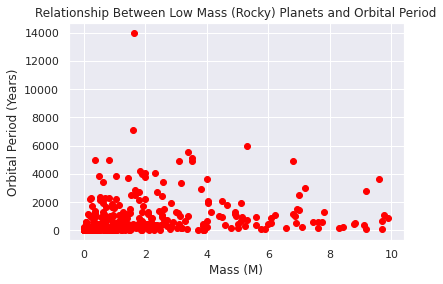

In [93]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Mass (M)')
plt.ylabel('Orbital Period (Years)')
plt.title('Relationship Between Low Mass (Rocky) Planets and Orbital Period')
plt.show()

In [94]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [95]:
y_predict = lm.predict(x_test)

print(f'Training dataset accuracy: {round(lm.score(x_train, y_train)*100, 2)}%')
print(f'Testing dataset accuracy: {round(lm.score(x_test, y_test)*100, 2)}%')

Training dataset accuracy: 4.47%
Testing dataset accuracy: 8.71%


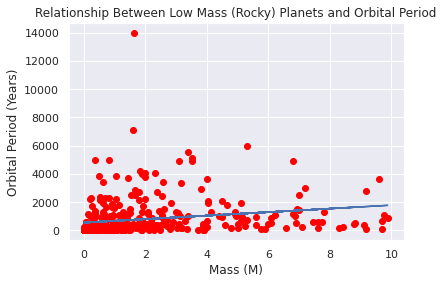

In [96]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Mass (M)')
plt.ylabel('Orbital Period (Years)')
plt.title('Relationship Between Low Mass (Rocky) Planets and Orbital Period')
plt.plot()
print()

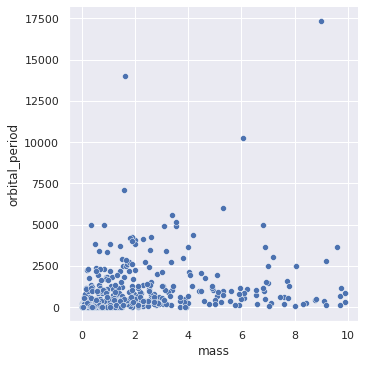

In [97]:
sns.relplot(x='mass', y='orbital_period', data=low_mass_planets)

## Conclusions
1. There is minimal predictive relationship between planetary mass and orbital period.
2. Slight correlation suggesting heavier low-mass planets have longer orbital periods.